# Текст

In [2]:
import numpy as np
import pandas as pd

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import fetch_20newsgroups

In [5]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [44]:
X_train, X_test = newsgroups_train.data, newsgroups_test.data
y_train, y_test = newsgroups_train.target, newsgroups_test.target

In [45]:
list(enumerate(newsgroups_train.target_names))

[(0, 'alt.atheism'),
 (1, 'comp.graphics'),
 (2, 'comp.os.ms-windows.misc'),
 (3, 'comp.sys.ibm.pc.hardware'),
 (4, 'comp.sys.mac.hardware'),
 (5, 'comp.windows.x'),
 (6, 'misc.forsale'),
 (7, 'rec.autos'),
 (8, 'rec.motorcycles'),
 (9, 'rec.sport.baseball'),
 (10, 'rec.sport.hockey'),
 (11, 'sci.crypt'),
 (12, 'sci.electronics'),
 (13, 'sci.med'),
 (14, 'sci.space'),
 (15, 'soc.religion.christian'),
 (16, 'talk.politics.guns'),
 (17, 'talk.politics.mideast'),
 (18, 'talk.politics.misc'),
 (19, 'talk.religion.misc')]

In [46]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [47]:
from nltk.corpus import stopwords

In [48]:
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [11]:
мама мама мама мыла раму          3 1 1 0 0 0 
привет привет Андрей              0 0 0 2 1 0
привет андрей                     0 0 0 1 0 1
я иду в магазин

{мама, мыла, раму, привет, Андрей, андрей}

SyntaxError: invalid syntax (2974905224.py, line 1)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TransformerMixin
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline

In [50]:
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [51]:
binary_vec = CountVectorizer(binary=True, max_features=10000)
count_vec = CountVectorizer(max_features=10000)
tfidf_vec = TfidfVectorizer(max_features=10000)

In [52]:
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
pipe = Pipeline([
    ('vectorize', binary_vec),
#     ('to_dense', DenseTransformer()),
    ('clf', bnb)
])

In [54]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorize', CountVectorizer(binary=True, max_features=10000)),
                ('clf', BernoulliNB())])

In [55]:
preds = pipe.predict(X_test)

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, precision_score, recall_score

In [57]:
print(precision_score(y_test, preds, average='macro'))
print(recall_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='macro'))

0.7338062402950905
0.6612423568428081
0.6774274572910653


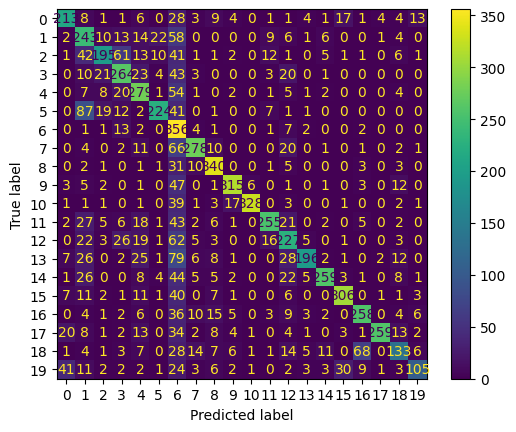

In [58]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=preds)

### K-nearest neighbors

In [27]:
from sklearn.datasets import load_wine, load_breast_cancer, load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_classes=3,
                           n_clusters_per_class=1, shift=4.77, scale=3.92, class_sep=1, random_state=2, )

In [29]:
X

array([[26.31909816, 16.71035762],
       [24.18238494, 14.66173213],
       [25.65102165, 25.38739525],
       ...,
       [27.70716259, 27.5208251 ],
       [27.22701881, 18.19923433],
       [13.41777462, 23.27972132]])

<AxesSubplot: >

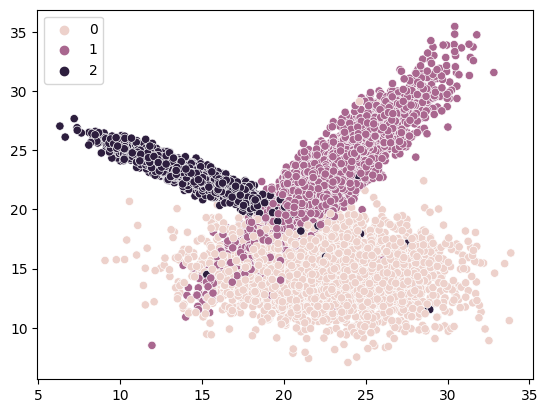

In [36]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.4, 
                                                    random_state=42, )

In [38]:
X_train.shape

(6000, 2)

In [39]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=19, weights='distance', p=2))
])

$$ a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ x_{i; u}=y \bigr] w(i,u) $$

$$ {\displaystyle \rho (x,y)=\left(\sum _{i=1}^{n}|x_{i}-y_{i}|^{p}\right)^{1/p}} $$

![pic](../pics/2D_unit_balls.svg)

In [40]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 KNeighborsClassifier(n_neighbors=19, weights='distance'))])

In [41]:
preds_test = pipe.predict(X_test)
preds_train = pipe.predict(X_train)

In [42]:
print('[TRAIN] Precision macro', precision_score(y_train, preds_train, average='macro'))
print('[TEST] Precision macro', precision_score(y_test, preds_test, average='macro'))
print()
print('[TRAIN] Recall macro', recall_score(y_train, preds_train, average='macro'))
print('[TEST] Recall macro', recall_score(y_test, preds_test, average='macro'))
print()
print('[TRAIN] F1 macro', f1_score(y_train, preds_train, average='macro'))
print('[TEST] F1 macro', f1_score(y_test, preds_test, average='macro'))


[TRAIN] Precision macro 1.0
[TEST] Precision macro 0.9489196949247791

[TRAIN] Recall macro 1.0
[TEST] Recall macro 0.9487534438017846

[TRAIN] F1 macro 1.0
[TEST] F1 macro 0.9487977697980648


In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


fig, ax = plt.subplots(figsize=(9, 5))
disp = DecisionBoundaryDisplay.from_estimator(
    pipe,
    X_test,
    response_method="predict",
    plot_method="pcolormesh",
    grid_resolution=1000,
    xlabel='x1',
    ylabel='x2',
    shading="auto",
    alpha=0.5,
    ax=ax,
)
scatter = disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", marker='.')
disp.ax_.legend(
    scatter.legend_elements()[0],
    [0, 1, 2],
    loc="lower left",
    title="Classes",
)
disp.ax_.set_title(
    f"3-Class classification\n(k={pipe[-1].n_neighbors})"
)

fig.show()

### Метод парзеновского окна

$$ a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ x_{i; u}=y \bigr] w(i,u) $$

$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$





$$ a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ x_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr) $$

In [26]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RadiusNeighborsClassifier(radius=1, weights='distance', p=2, outlier_label=-1))
])

In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 RadiusNeighborsClassifier(outlier_label=-1, radius=1,
                                           weights='distance'))])

In [28]:
preds_test = pipe.predict(X_test)
preds_train = pipe.predict(X_train)

In [29]:
print('[TRAIN] Precision macro', precision_score(y_train, preds_train, average='macro'))
print('[TEST] Precision macro', precision_score(y_test, preds_test, average='macro'))
print()
print('[TRAIN] Recall macro', recall_score(y_train, preds_train, average='macro'))
print('[TEST] Recall macro', recall_score(y_test, preds_test, average='macro'))
print()
print('[TRAIN] F1 macro', f1_score(y_train, preds_train, average='macro'))
print('[TEST] F1 macro', f1_score(y_test, preds_test, average='macro'))


[TRAIN] Precision macro 1.0
[TEST] Precision macro 0.9843241805917685

[TRAIN] Recall macro 1.0
[TEST] Recall macro 0.9842451093422544

[TRAIN] F1 macro 1.0
[TEST] F1 macro 0.9842478896358006


In [35]:
pipe.predict([[100000, 20]])

array([-1])

### Ядра

![pic](../pics/image012.jpg )



| Ядро    | Формула |
| --------: | :------- |
|Епанечникова|	$$K_1(r)=E(r)=\frac{3}{4}(1-r^2){[}{|}r{|}<=1{]}$$|
|Квартическое|	$$K_2(r)=Q(r)=\frac{15}{16}(1-r^2)^2{[}{|}r{|}<=1{]}$$|
|Треугольное|	$$K_3(r)=T(r)=(1-{|}r{|}){[}{|}r{|}<=1{]}$$|
|Гауссовское|	$$K_4(r)=G(r)=(2\pi)^{(-\frac{1}{2})}exp(-\frac{1}{2}r^2)$$|
|Прямоугольное|	$$K_5(r)=\Pi(r)=\frac{1}{2}{[}{|}r{|}<=1{]}$$|



In [140]:
def kernel_epanechnikov(distances):
    return ((3/4) * (1-np.power(distances, 2))) * (np.abs(distances) <= 1)

def kernel_squared(distances):
    return (15/16) * np.power(1-np.power(distances, 2), 2) * (np.abs(distances) <= 1)

def kernel_triangle(distances):
    return (1 - np.abs(distances)) * (np.abs(distances) <= 1)

def kernel_gaussian(distances):
    return np.power(2*np.pi, -0.5) * np.exp(-0.5*np.power(distances, 2))

def kernel_rectangle(distances):
    return 0.5 * (np.abs(distances) <= 1)

In [141]:
x = np.linspace(-1.1, 1.1, 100)
y1 = kernel_epanechnikov(x)
y2 = kernel_squared(x)
y3 = kernel_triangle(x)
y4 = kernel_gaussian(x)
y5 = kernel_rectangle(x)

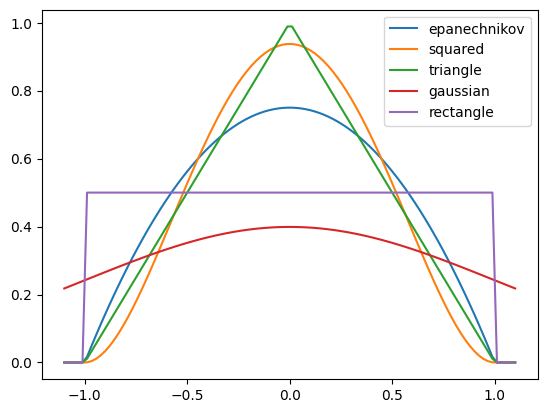

In [142]:
plt.plot(x, y1, label='epanechnikov')
plt.plot(x, y2, label='squared')
plt.plot(x, y3, label='triangle')
plt.plot(x, y4, label='gaussian')
plt.plot(x, y5, label='rectangle')

plt.legend()

In [143]:
def kernel_epanechnikov(distances):
    return ((3/4) * (1-np.power(distances, 2))) #* (np.abs(distances) <= 1)

def kernel_squared(distances):
    return (15/16) * np.power(1-np.power(distances, 2), 2) #* (np.abs(distances) <= 1)

def kernel_triangle(distances):
    return (1 - np.abs(distances)) # * (np.abs(distances) <= 1)

def kernel_gaussian(distances):
    return np.power(2*np.pi, -0.5) * np.exp(-0.5*np.power(distances, 2))

def kernel_rectangle(distances):
    return 0.5 #* (np.abs(distances) <= 1)

In [166]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RadiusNeighborsClassifier(radius=1, weights=kernel_epanechnikov, p=2, outlier_label=-1, ))
])

In [167]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 RadiusNeighborsClassifier(outlier_label=-1, radius=1,
                                           weights=<function kernel_epanechnikov at 0x2bc336200>))])

In [168]:
preds = pipe.predict(X_test)

In [169]:
preds[preds == -1]

array([], dtype=int64)

### Функции потерь

In [170]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=1, weights='distance', p=1))
])

In [171]:
from sklearn.metrics import log_loss, hinge_loss, zero_one_loss

Hinge Loss
$$ max(0, 1 - y \cdot \hat{y}) $$

Logistic Loss 
$$ -\sum_{c=1}^My_{o,c}\log(p_{o,c}) $$

0-1 Loss
$$ -\sum_{c=1}^{M-1} 1 [y_i \neq \hat{y}_i]$$

In [181]:
from tqdm.notebook import tqdm

In [188]:
x = list(range(1, 251, 2))
ll_train = []
ll_test = []
hl_train = []
hl_test = []
zol_train = []
zol_test = []

for n_neighbors in tqdm(x):
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', p=2))
    ])
    
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    probas_train = pipe.predict_proba(X_train)
    probas_test = pipe.predict_proba(X_test)
    
    zerooneloss = zero_one_loss(y_train, preds_train)
    zol_train.append(zerooneloss)
    zerooneloss = zero_one_loss(y_test, preds_test)
    zol_test.append(zerooneloss)
    
    hingeloss = hinge_loss(y_train, probas_train)
    hl_train.append(hingeloss)
    hingeloss = hinge_loss(y_test, probas_test)
    hl_test.append(hingeloss)
    
    logloss = log_loss(y_train, probas_train)
    ll_train.append(logloss)
    logloss = log_loss(y_test, probas_test)
    ll_test.append(logloss)
    

  0%|          | 0/125 [00:00<?, ?it/s]

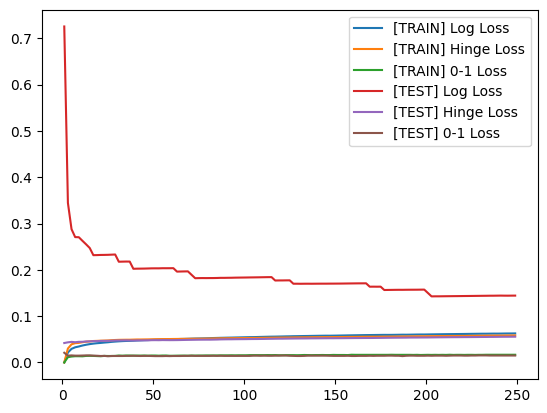

In [189]:
plt.plot(x, ll_train, label='[TRAIN] Log Loss')
plt.plot(x, hl_train, label='[TRAIN] Hinge Loss')
plt.plot(x, zol_train, label='[TRAIN] 0-1 Loss')
plt.plot(x, ll_test, label='[TEST] Log Loss')
plt.plot(x, hl_test, label='[TEST] Hinge Loss')
plt.plot(x, zol_test, label='[TEST] 0-1 Loss')
plt.legend()